In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [44]:
import json
import csv
with open("CompareChart.json","r") as JsonReader:
    chart = json.loads(JsonReader.read())

with open("outputFinal.csv",newline='',encoding="utf8") as csvfile:
    rowtemp = csv.reader(csvfile, delimiter=',')
    rows = [row for row in rowtemp]

In [45]:
def getKey(label):
    print(label)
    for key,value in chart.items():
        if(label == value):
            return key
    return "0_"

def getImage(label):
    for row in rows:
        if(row[0] == label):
            return row

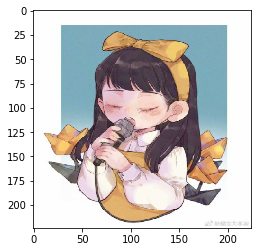

In [3]:
save_model_path = './logs/1557744378/model'

img = cv2.imdecode(np.fromfile(r"C:\Users\PC-Henry\Desktop\美心.jpg",dtype=np.uint8),-1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.show()

In [4]:
sess = tf.Session()    
saver = tf.train.import_meta_graph(save_model_path+"/TransferModel.meta")
saver.restore(sess,tf.train.latest_checkpoint(save_model_path))
prediction = tf.get_collection('pred_network')[0]
graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input_x:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
logits  = graph.get_tensor_by_name("logits:0")
prediction = tf.argmax(logits,1)

INFO:tensorflow:Restoring parameters from ./logs/1557744378/model\TransferModel


In [5]:
label = sess.run(prediction,feed_dict={x:[img],keep_prob:1})
print(label[0])

650


In [6]:
muti_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits),3),feed_dict={x:[img],keep_prob:1})

In [11]:
print(muti_predictions)
print(muti_predictions.values[0],muti_predictions.indices[0])

TopKV2(values=array([[0.5024382 , 0.21685156, 0.12405384]], dtype=float32), indices=array([[650,  81, 317]]))
[0.5024382  0.21685156 0.12405384] [650  81 317]


650
81
317


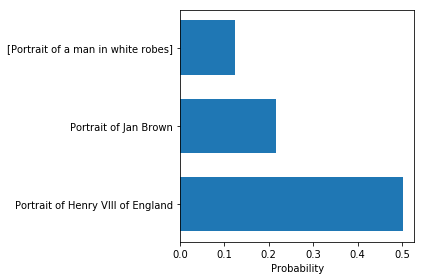

In [49]:
fig = plt.figure()

plt.barh([getImage(getKey(x))[1] for x in muti_predictions.indices[0]],muti_predictions.values[0],height=0.7)
plt.xlabel("Probability")
plt.tight_layout()
fig.savefig("filename.png")